### 이미지 불러오기

In [126]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob

from ipywidgets import interact
from PIL import Image
from glob import glob

In [128]:
# 원본 데이터
o_image_path = "./CRACK500/traindata/images/"
o_mask_path = "./CRACK500/traindata/masks/"

images_paths = glob(o_image_path+"*.jpg")
masks_paths = glob(o_mask_path + "*.png")

df_origin = pd.DataFrame({'images': images_paths, 'masks': masks_paths})
df_origin.head(5)

,images,masks
0,./CRACK500/traindata/images\20160222_081011.jpg,./CRACK500/traindata/masks\20160222_081011_mas...
1,./CRACK500/traindata/images\20160222_081031.jpg,./CRACK500/traindata/masks\20160222_081031_mas...
2,./CRACK500/traindata/images\20160222_081102.jpg,./CRACK500/traindata/masks\20160222_081102_mas...
3,./CRACK500/traindata/images\20160222_081111.jpg,./CRACK500/traindata/masks\20160222_081111_mas...
4,./CRACK500/traindata/images\20160222_081113.jpg,./CRACK500/traindata/masks\20160222_081113_mas...


In [111]:
# cropped 데이터
c_path = "./CRACK500/crop/traincrop/"
masks_paths = glob(c_path + "*.png")

df_crop = pd.DataFrame({'masks': masks_paths})
df_crop.head(5)

,masks
0,./CRACK500/crop/traincrop\20160222_081011_1281...
1,./CRACK500/crop/traincrop\20160222_081011_1921...
2,./CRACK500/crop/traincrop\20160222_081011_1_36...
3,./CRACK500/crop/traincrop\20160222_081011_1_72...
4,./CRACK500/crop/traincrop\20160222_081011_641_...


In [129]:
@interact(index=(0, len(df_origin)-1))
def show_images(index=0):
    image = cv2.imread(df_origin.iloc[index].images)
    mask = cv2.imread(df_origin.iloc[index].masks)

    plt.figure(figsize=(12,10))
    plt.subplot(121)
    plt.title("image")
    plt.imshow(image)
    plt.subplot(122)
    plt.title("mask")
    plt.imshow(mask)
    plt.tight_layout()

interactive(children=(IntSlider(value=0, description='index', max=239), Output()), _dom_classes=('widget-inter…

### Alpha blending

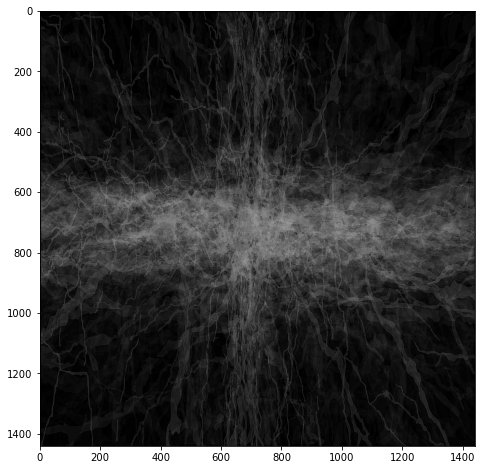

In [115]:
# 원본 이미지

dst = cv2.imread(df_origin.iloc[0].masks)
dst = cv2.resize(dst,(1440, 1440))

for i in range(0, len(df_origin)):
    if i == 0:
        pass
    else:
        img = cv2.imread(df_origin.iloc[i].masks)
        img = cv2.resize(img, (1440,1440))
        alpha = 1.0/(i+1)
        beta = 1.0 - alpha
        dst = cv2.addWeighted(img, alpha, dst, beta, 0)
        kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
        im = cv2.filter2D(dst, -1, kernel)
        
plt.figure(figsize=(8,8))
plt.imshow(im)

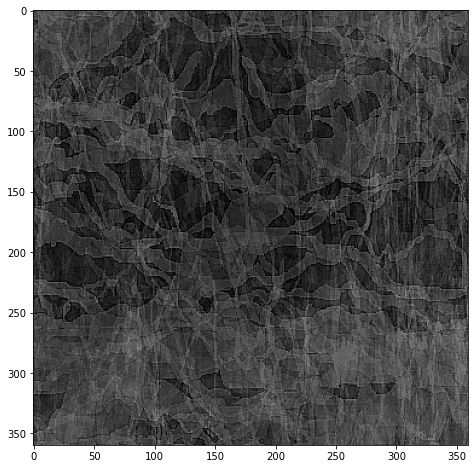

In [116]:
# cropped 이미지

dst = cv2.imread(df_crop.iloc[0].masks)
dst = cv2.resize(dst,(360, 360))

for i in range(0, len(df_crop)):
    if i == 0:
        pass
    else:
        img = cv2.imread(df_crop.iloc[i].masks)
        img = cv2.resize(img, (360,360))
        alpha = 1.0/(i+1)
        beta = 1.0 - alpha
        dst = cv2.addWeighted(img, alpha, dst, beta, 0)
        kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
        im = cv2.filter2D(dst, -1, kernel)
plt.figure(figsize=(8,8))
plt.imshow(im)

### Crack rate

In [130]:
df_origin.head(5)

,images,masks
0,./CRACK500/traindata/images\20160222_081011.jpg,./CRACK500/traindata/masks\20160222_081011_mas...
1,./CRACK500/traindata/images\20160222_081031.jpg,./CRACK500/traindata/masks\20160222_081031_mas...
2,./CRACK500/traindata/images\20160222_081102.jpg,./CRACK500/traindata/masks\20160222_081102_mas...
3,./CRACK500/traindata/images\20160222_081111.jpg,./CRACK500/traindata/masks\20160222_081111_mas...
4,./CRACK500/traindata/images\20160222_081113.jpg,./CRACK500/traindata/masks\20160222_081113_mas...


In [131]:
rate = []

for i in range(len(df_origin)):
    
    # 계산하기 편하도록 이미지를 GrayScale로 변환
    msk = cv2.imread(df_origin.iloc[i].masks)
    msk = cv2.cvtColor(msk, cv2.COLOR_BGR2GRAY)

    pixel=0   # 균열 픽셀 수 
    for i in msk:
        for j in i:
            if j == 255:
                pixel += 1  # pixel값이 255면 균열인 부분이므로 pixel 수 1증가

    res = round(pixel/(1440*2560) * 100, 2) # (균열 픽셀 수)/(전체 픽셀)X100 으로 균열이 이미지에서 차지하는 비율을 구한다.
    rate.append(res)

In [145]:
msk1d = np.array(msk).flatten().tolist()

In [147]:
with open('test.txt', 'w') as file:
    file.write(str(msk1d))

In [133]:
df_origin['rate'] = rate
df_origin.head(5)

,images,masks,rate
0,./CRACK500/traindata/images\20160222_081011.jpg,./CRACK500/traindata/masks\20160222_081011_mas...,0.99
1,./CRACK500/traindata/images\20160222_081031.jpg,./CRACK500/traindata/masks\20160222_081031_mas...,3.26
2,./CRACK500/traindata/images\20160222_081102.jpg,./CRACK500/traindata/masks\20160222_081102_mas...,1.24
3,./CRACK500/traindata/images\20160222_081111.jpg,./CRACK500/traindata/masks\20160222_081111_mas...,0.76
4,./CRACK500/traindata/images\20160222_081113.jpg,./CRACK500/traindata/masks\20160222_081113_mas...,1.03


In [150]:
df_origin.describe()

,rate
count,240.000000
mean,3.118000
std,1.887577
min,0.220000
25%,1.675000
50%,2.900000
75%,4.415000
max,9.460000


In [152]:
# 3Channel
rate2 = []

for i in range(len(df_origin)):
    
    # 계산하기 편하도록 이미지를 GrayScale로 변환
    msk = cv2.imread(df_origin.iloc[i].masks)

    pixel=0   # 균열 픽셀 수 
    for i in msk:
        for j in i:
            for z in j:
                if z == 255:
                    pixel += 1  # pixel값이 255면 균열인 부분이므로 pixel 수 1증가

    res = round(pixel/(1440*2560) * 100, 2) # (균열 픽셀 수)/(전체 픽셀)X100 으로 균열이 이미지에서 차지하는 비율을 구한다.
    rate2.append(res)

In [160]:
msk = cv2.imread(df_origin.iloc[0].masks)
msk = cv2.cvtColor(msk, cv2.COLOR_BGR2GRAY)


In [199]:
white_p = np.sum(msk!=0)
black_p = np.sum(msk==0)
p = np.sum(msk!=255)

In [200]:
print(white_p)
print(black_p)

36315
3650085


In [201]:
print(white_p + black_p)
print(1440*2560)

3686400
3686400


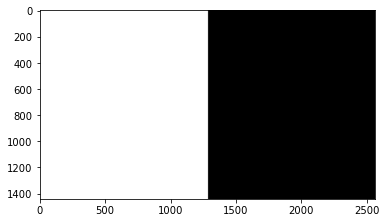

In [211]:
test = cv2.imread('./test.png')
plt.imshow(test)

In [212]:
test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
white_p = np.sum(test==255)
black_p = np.sum(test==0)

In [213]:
print(white_p)

1848960


In [214]:
print(white_p/(white_p+black_p)*100)

50.15625
